<a href="https://colab.research.google.com/github/sanjeevtrivedi/pgd-dsai/blob/main/TASession11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.util.shape import view_as_windows

In [ ]:
# source: https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output


# # source: https://stackoverflow.com/questions/62442341/vectorizing-2d-convolutions-in-numpy
# def convolve2D(img, kernel,padding=0,strides=1):
#   m=kernel.shape[0]
#   n=kernel.shape[1]
#   if padding!=0:
#     img = np.pad(img, pad_width=padding, mode='constant', constant_values=0)
#   sub_matrices = view_as_windows(img, (m,n), strides)
#   convolved = np.einsum('ij,klij->kl',kernel,sub_matrices)
#   return convolved

In [ ]:
def processImage(image):
  image = cv2.imread(image)
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
  return image

In [ ]:
img = processImage('mandala.jpg')
img_rose = processImage('rose.jpg')

In [ ]:
print(type(img), '\t', img.shape)
print(type(img_rose), '\t', img_rose.shape)

<class 'numpy.ndarray'> 	 (612, 612)
<class 'numpy.ndarray'> 	 (2000, 3008)


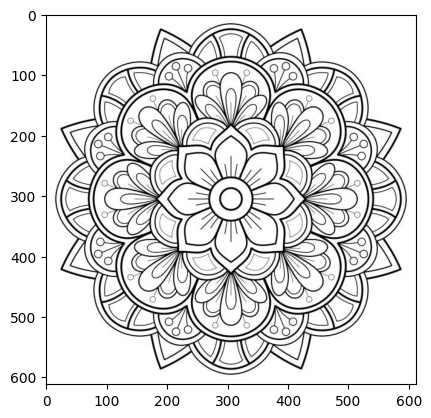

In [ ]:
plt.imshow(img, cmap='gray')

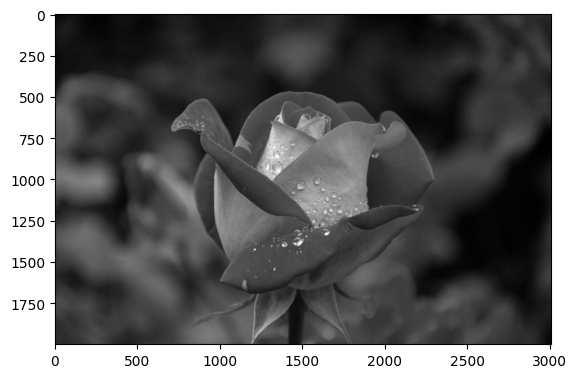

In [ ]:
plt.imshow(img_rose, cmap='gray')

In [ ]:
# Identity Kernel
idkernel = np.array(
    [[0,0,0],
     [0,1,0],
     [0,0,0]]
  )

# Edge Detection
edgekernel = np.array(
    [[0,-1,0],
     [-1,4,-1],
     [0,-1,0]]
  )

# Gaussian Blur
blurkernel = np.array(
    [[1,2,1],
     [2,4,2],
      [1,2,1]]
  )*(1/16)

In [ ]:
# processed_img = convolve2D(img, idkernel,padding=0,strides=1)
# processed_img = convolve2D(img, idkernel,padding=1,strides=1)
# processed_img = convolve2D(img, idkernel,padding=1,strides=2)
# processed_img = convolve2D(img, idkernel,padding=1,strides=4)
# processed_img = convolve2D(img, idkernel,padding=1,strides=8)

# processed_img = convolve2D(img, edgekernel,padding=0,strides=1)
# processed_img = convolve2D(img, edgekernel,padding=1,strides=1)
# processed_img = convolve2D(img, edgekernel,padding=1,strides=2)
# processed_img = convolve2D(img, edgekernel,padding=1,strides=4)
# processed_img = convolve2D(img, edgekernel,padding=1,strides=8)

processed_img = convolve2D(img_rose, blurkernel,padding=0,strides=1)
# processed_img = convolve2D(img_rose, blurkernel,padding=1,strides=1)
# processed_img = convolve2D(img_rose, blurkernel,padding=1,strides=2)
# processed_img = convolve2D(img_rose, blurkernel,padding=1,strides=4)
# processed_img = convolve2D(img_rose, blurkernel,padding=1,strides=8)









processed_img.shape

(1998, 3006)

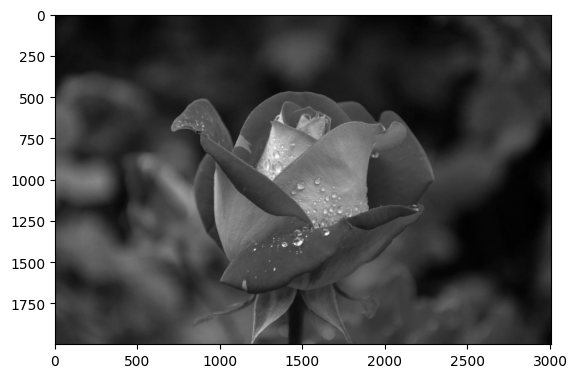

In [ ]:
plt.imshow(processed_img, cmap='gray')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 

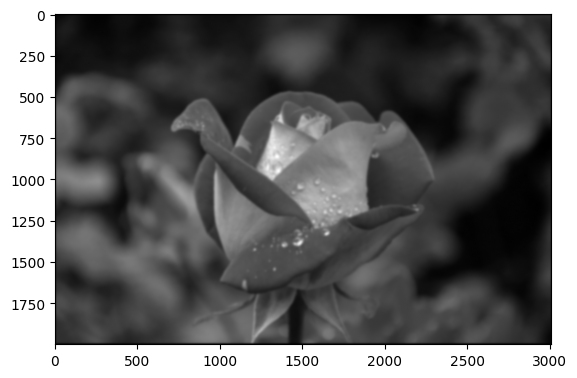

In [ ]:
processed_img=img_rose
for i in range(80):
  print(i, end=' ')
  processed_img = convolve2D(processed_img, blurkernel, padding=1, strides=1)

plt.imshow(processed_img, cmap='gray')


In [ ]:
paddedimg = np.pad(img, pad_width=2, mode='constant', constant_values=0)
paddedimg.shape

In [ ]:
vawimg = view_as_windows(img, (3,3), 2)
vawimg.shape